### Imports

In [1]:
import pandas as pd
import numpy as np
import time
from datetime import timedelta, datetime
from sklearn.decomposition import LatentDirichletAllocation

### Reading in the data

In [2]:
data = pd.read_csv("subject_verb_df.csv", index_col=0)

In [3]:
data.head()

,olema,teadma,ütlema,tahtma,saama,tähendama,tegema,lisama,arvama,nägema,...,kiduma,klõbisema,runnima,viidsima,pritsuma,ketaalima,seiduma,ücima,müübima,juksima
tema,210031,15303,43006,22397,37392,829,33115,31796,7440,11059,...,0,0,0,0,0,0,0,0,0,0
mina,122824,48357,22122,41302,39695,131,29568,659,30362,21060,...,0,0,3,3,0,0,0,3,0,0
see,498627,2305,1064,868,7488,38195,10684,820,201,1968,...,0,0,0,0,3,0,0,0,0,0
mis,159528,607,2033,1970,17968,12900,11499,564,739,3730,...,0,0,0,0,0,0,0,0,0,0
kes,81930,8050,4846,15278,16658,34,13727,303,2673,3735,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data = data.T

In [5]:
data.head()

,tema,mina,see,mis,kes,sina,inimene,mees,keegi,kõik,...,kehralane,väät,Corretja,Pacers,promootor,Cathy,Mumme,Kosk,tsiviilkolleegium,häältelugemine
olema,210031,122824,498627,159528,81930,35613,46751,23783,14516,38630,...,11,9,6,11,10,10,0,0,6,8
teadma,15303,48357,2305,607,8050,9004,2690,916,7343,2215,...,0,0,0,0,0,0,0,0,0,0
ütlema,43006,22122,1064,2033,4846,5817,1128,2147,2587,437,...,0,11,5,0,9,7,9,10,0,0
tahtma,22397,41302,868,1970,15278,9195,3214,1342,4507,1215,...,0,0,0,0,0,0,0,0,0,0
saama,37392,39695,7488,17968,16658,8872,12670,4196,3678,2996,...,6,0,5,6,0,0,0,0,0,0


### Optimizing LDA

In [6]:
print(str(timedelta(seconds=time.time()+7200)).split(", ")[1])
start = datetime.now()

models = {}
perplexities = {}

for n in range(100, 1001, 100):
    model = LatentDirichletAllocation(n_components=n, random_state=0)
    model.fit(data)
    perplexity = model.perplexity(data)
    print(f"Model with {n} topics fitted and perplexity found at {str(timedelta(seconds=time.time()+7200)).split(', ')[1]}.")
    models[n] = model
    perplexities[n] = perplexity
            
print(str(timedelta(seconds=time.time()+7200)).split(", ")[1])
print(datetime.now()-start)

0:30:06.992712
Model with 100 topics fitted and perplexity found at 0:31:16.956585.
Model with 200 topics fitted and perplexity found at 0:33:59.698751.
Model with 300 topics fitted and perplexity found at 0:38:06.576801.
Model with 400 topics fitted and perplexity found at 0:44:13.502969.
Model with 500 topics fitted and perplexity found at 0:51:28.928835.
Model with 600 topics fitted and perplexity found at 1:00:16.142417.
Model with 700 topics fitted and perplexity found at 1:09:48.630143.
Model with 800 topics fitted and perplexity found at 1:21:39.628375.
Model with 900 topics fitted and perplexity found at 1:32:48.832116.
Model with 1000 topics fitted and perplexity found at 1:43:20.843671.
1:43:20.845667
1:13:13.854926


In [7]:
perplexities

{100: 445.88228413818115,
 200: 436.819782462329,
 300: 431.2774020061694,
 400: 430.00017928485437,
 500: 425.90128579688985,
 600: 425.04770835571276,
 700: 428.4575732611306,
 800: 425.74122495559783,
 900: 431.7873805361368,
 1000: 424.9820897843095}

In [10]:
from matplotlib import pyplot as plt

Text(0, 0.5, 'Perplexity')

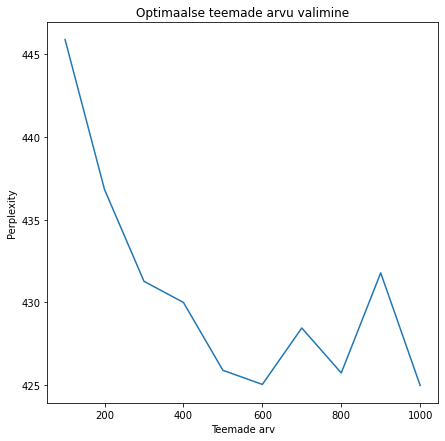

In [11]:
plt.figure(figsize=(7, 7))

plt.plot(list(range(100, 1001, 100)), perplexities.values())

plt.title("Optimaalse teemade arvu valimine")
plt.xlabel("Teemade arv")
plt.ylabel("Perplexity")